# Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%config InlineBackend.figure_format = 'svg'

In [4]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [1]:
data.head()

NameError: name 'data' is not defined

In [ ]:
test.head()

In [ ]:
data.info()

In [ ]:
data.describe()

In [ ]:
data.describe(include = 'O')

In [ ]:
data.isna().sum()

In [5]:
#numerical = data.select_dtypes(include = ['int64', 'float64']).columns.tolist()
numerical = ['Age', 'Fare', 'SibSp', 'Parch']
numerical

['Age', 'Fare', 'SibSp', 'Parch']

In [6]:
#categorical = data.select_dtypes(include = ['object']).columns.tolist()
categorical = ['Sex', 'Cabin', 'Embarked', 'Pclass']
categorical

['Sex', 'Cabin', 'Embarked', 'Pclass']

## Numerical Features

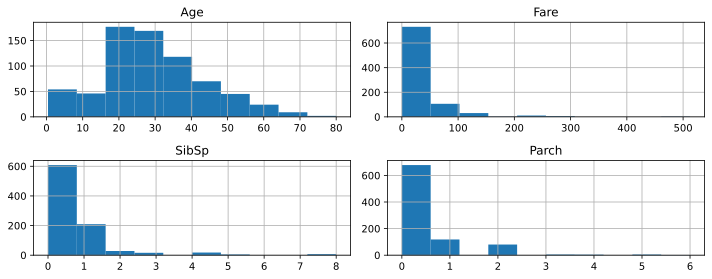

In [7]:
data[numerical].hist(figsize = (10,4))
plt.tight_layout()

In [ ]:
sns.countplot(x = data['SibSp'])

In [ ]:
sns.countplot(x = data['Parch'])

In [ ]:
fig, ax = plt.subplots(2,2, sharex = False)

sns.kdeplot(data['Age'], ax = ax[0,0])
sns.kdeplot(data['Fare'], ax = ax[0,1])
sns.boxplot(x = data['Age'], ax = ax[1,0])
sns.boxplot(x = data['Fare'], ax = ax[1,1])

plt.tight_layout()

In [ ]:
fig, ax = plt.subplots(2,2, sharex = False)

sns.kdeplot(data['SibSp'], ax = ax[0,0])
sns.kdeplot(data['Parch'], ax = ax[0,1])
sns.boxplot(x = data['SibSp'], ax = ax[1,0])
sns.boxplot(x = data['Parch'], ax = ax[1,1])

plt.tight_layout()

In [ ]:
# for feature in [ 'Pclass', 'Parch', 'SibSp']:
#     print(feature)
#     print(data[feature].value_counts())

## Categorical Features

In [ ]:
categorical

In [ ]:
for feature in categorical:
    print('feature ' + feature + ' has unique values:')
    print(data[feature].nunique())
    print()

In [ ]:
data['Embarked'].unique()

In [ ]:
sns.countplot(x = data['Embarked'])

In [ ]:
sns.countplot(x = data['Sex'])

In [ ]:
data['Cabin']

In [ ]:
data['Ticket']

## Correlation and Target Variable

In [ ]:
plt.pie(data['Survived'].value_counts(), labels = ['Died', 'Survived'], autopct = '%1.1f%%')
plt.title('Proportion of Survived')
plt.show()

In [ ]:
sns.heatmap(data.corr().abs())

### Categorical

In [ ]:
categorical

In [ ]:
sns.countplot(x = data['Pclass'], hue = data['Survived'])
plt.title('Survival Distribution Across Pclass (Ticket Class)')
plt.show()

In [ ]:
sns.countplot(x = data['Embarked'], hue = data['Survived'])
plt.title('Survival Distribution Across Embarked (Port of Embarkation)')
plt.show()

In [ ]:
ax = sns.countplot(x = data['Sex'], hue = data['Survived'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Survival Distribution Across Sex')
plt.show()   

In [ ]:
male = data[data['Sex'] == 'male']
survived_male_age = male[male['Survived'] == 1]['Age']
sns.histplot(x = survived_male_age)
plt.title('Age Distribution of Survived Males')
plt.show()

In [ ]:
female = data[data['Sex'] == 'female']
survived_female_age = female[female['Survived'] == 1]['Age']
sns.histplot(x = survived_female_age)
plt.title('Age Distribution of Survived Females')
plt.show()

In [ ]:
mf = pd.concat([survived_male_age, survived_female_age],ignore_index = True, axis = 1)
sns.histplot(data = mf, kde = True)
plt.legend(['Male', 'Female'])
plt.xlabel('Age')
plt.show()

### Numerical

In [ ]:
numerical

In [ ]:
sns.scatterplot(x = data['Age'], y = data['Fare'], hue = data['Survived'] )
plt.ylim(0,600)

In [ ]:
numerical

In [ ]:
ax = sns.countplot(x = data['SibSp'], hue = data['Survived'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Survival Distribution Across Number of SIblings')
plt.show()   

In [ ]:
ax = sns.countplot(x = data['Parch'], hue = data['Survived'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Survival Distribution Across Number of parents/children')
plt.show()   

In [ ]:
sns.scatterplot(x = data['Age'], y = data['Survived'])
plt.show()

sns.scatterplot(x = data['Fare'], y = data['Survived'])
plt.show()

sns.scatterplot(x = data['SibSp'], y = data['Survived'])
plt.show()

sns.scatterplot(x = data['Parch'], y = data['Survived'])
plt.show()

# Data Preprocessing

## Feature Engineering

<font size="5">Name</font>

In [8]:
data['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

https://www.w3schools.com/python/python_regex.asp Regular expressions for Series.str.extract()
https://pandas.pydata.org/docs/reference/api/pandas.Series.str.extract.html 

In [9]:
data['Title'] =  data['Name'].str.extract('([a-zA-Z]+)\.')
data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [10]:
test['Title'] = test['Name'].str.extract('([a-zA-Z]+)\.')
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [11]:
def title(name):
    if name == 'Mr':
        return 'Mr'
    elif name == 'Mrs':
        return 'Mrs'
    elif name == 'Miss':
        return 'Miss'
    elif name == 'Master':
        return 'Master'
    else:
        return 'Other'

In [12]:
data['Title'] = data['Title'].map(title)
test['Title'] = test['Title'].map(title)

In [13]:
data = data.drop('Name', axis = 1)
test = test.drop('Name', axis = 1)

In [46]:
data['Relatives'] = data['SibSp'] + data['Parch']

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Relatives
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,Other,0
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,Miss,0
888,889,0,3,female,18.0,1,2,W./C. 6607,23.4500,NaN,S,Miss,3
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C,Mr,0


In [49]:
data = data.drop(['SibSp', 'Parch'], axis = 1)
data

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Relatives
0,1,0,3,male,22.0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,female,38.0,PC 17599,71.2833,C85,C,Mrs,1
2,3,1,3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,Miss,0
3,4,1,1,female,35.0,113803,53.1000,C123,S,Mrs,1
4,5,0,3,male,35.0,373450,8.0500,NaN,S,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,211536,13.0000,NaN,S,Other,0
887,888,1,1,female,19.0,112053,30.0000,B42,S,Miss,0
888,889,0,3,female,18.0,W./C. 6607,23.4500,NaN,S,Miss,3
889,890,1,1,male,26.0,111369,30.0000,C148,C,Mr,0


In [51]:
test['Relatives'] = test['SibSp'] + test['Parch']
test = test.drop(['SibSp', 'Parch'], axis = 1)
test

,Pclass,Sex,Age,Fare,Embarked,Title,Relatives
0,3,male,34.5,7.8292,Q,Mr,0
1,3,female,47.0,7.0000,S,Mrs,1
2,2,male,62.0,9.6875,Q,Mr,0
3,3,male,27.0,8.6625,S,Mr,0
4,3,female,22.0,12.2875,S,Mrs,2
...,...,...,...,...,...,...,...
413,3,male,25.0,8.0500,S,Mr,0
414,1,female,39.0,108.9000,C,Other,0
415,3,male,38.5,7.2500,S,Mr,0
416,3,male,25.0,8.0500,S,Mr,0


## Missing Values

In [14]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [15]:
test.isna().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

<font size="5">Age</font>

In [ ]:
data.corr()['Age'] 

In [ ]:
sns.boxplot(x = data['Age'], y = data['Title'])

In [ ]:
data.groupby('Title').median()

In [ ]:
data.groupby('Title').median()['Age']

In [ ]:
data.head()

In [ ]:
# data.loc[0,'Age'] == np.nan

In [16]:
data[data['Age'] == 0]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


In [17]:
data['Age'] = data['Age'].fillna(0)

In [18]:
data[data['Age'] == 0]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
5,6,0,3,male,0.0,0,0,330877,8.4583,NaN,Q,Mr
17,18,1,2,male,0.0,0,0,244373,13.0000,NaN,S,Mr
19,20,1,3,female,0.0,0,0,2649,7.2250,NaN,C,Mrs
26,27,0,3,male,0.0,0,0,2631,7.2250,NaN,C,Mr
28,29,1,3,female,0.0,0,0,330959,7.8792,NaN,Q,Miss
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,male,0.0,0,0,2629,7.2292,NaN,C,Mr
863,864,0,3,female,0.0,8,2,CA. 2343,69.5500,NaN,S,Miss
868,869,0,3,male,0.0,0,0,345777,9.5000,NaN,S,Mr
878,879,0,3,male,0.0,0,0,349217,7.8958,NaN,S,Mr


In [19]:
data.loc[888]

PassengerId           889
Survived                0
Pclass                  3
Sex                female
Age                   0.0
SibSp                   1
Parch                   2
Ticket         W./C. 6607
Fare                23.45
Cabin                 NaN
Embarked                S
Title                Miss
Name: 888, dtype: object

In [ ]:
# data.loc[888,'Title']

In [ ]:
# data.groupby('Title').median()['Age']['Miss']

In [ ]:
# data.groupby('Title').median()['Age'][data.loc[888,'Title']]

In [20]:
for i in range(len(data)):
    if data.loc[i, 'Age'] == 0:
        median_value_by_title = data.groupby('Title').median()['Age'][data.loc[i,'Title']]
        data.loc[i,'Age'] =  median_value_by_title

In [21]:
test['Age'] = test['Age'].fillna(0)

In [22]:
for i in range(len(test)):
    if test.loc[i, 'Age'] == 0:
        median_value_by_title = test.groupby('Title').median()['Age'][test.loc[i,'Title']]
        test.loc[i,'Age'] =  median_value_by_title

In [ ]:
# data['Age'] = data['Age'].fillna(data['Age'].median())

In [ ]:
# test['Age'] = test['Age'].fillna(test['Age'].median())

<font size="5">Fare</font>

In [26]:
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

In [27]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [28]:
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])

In [ ]:
# df = df.dropna(axis = 0).reset_index(drop = True)
# test = test.dropna(axis = 0).reset_index(drop = True)

## Data Preprocessing

Outliers 

In [34]:
data.loc[data['Fare'] > 300, 'Fare'] = data['Fare'].mean()

In [36]:
test.loc[test['Fare'] > 300, 'Fare'] = test['Fare'].mean()

In [37]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,Other
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,female,18.0,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C,Mr


In [50]:
df = data.drop(['PassengerId','Ticket', 'Cabin'], axis = 1)
df

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Relatives
0,0,3,male,22.0,7.2500,S,Mr,1
1,1,1,female,38.0,71.2833,C,Mrs,1
2,1,3,female,26.0,7.9250,S,Miss,0
3,1,1,female,35.0,53.1000,S,Mrs,1
4,0,3,male,35.0,8.0500,S,Mr,0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,Other,0
887,1,1,female,19.0,30.0000,S,Miss,0
888,0,3,female,18.0,23.4500,S,Miss,3
889,1,1,male,26.0,30.0000,C,Mr,0


In [63]:
test = test.drop(['PassengerId',  'Ticket', 'Cabin'], axis = 1)
test.head()

,Pclass,Age,Fare,Relatives,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,3,34.5,7.8292,0,0,1,0,1,0,0,0,1,0,0
1,3,47.0,7.0000,1,1,0,0,0,1,0,0,0,1,0
2,2,62.0,9.6875,0,0,1,0,1,0,0,0,1,0,0
3,3,27.0,8.6625,0,0,1,0,0,1,0,0,1,0,0
4,3,22.0,12.2875,2,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,25.0,8.0500,0,0,1,0,0,1,0,0,1,0,0
414,1,39.0,108.9000,0,1,0,1,0,0,0,0,0,0,1
415,3,38.5,7.2500,0,0,1,0,0,1,0,0,1,0,0
416,3,25.0,8.0500,0,0,1,0,0,1,0,0,1,0,0


### One hot Encoding

In [ ]:
# cat = ['Sex', 'Embarked', 'Pclass']
# num = ['Age', 'SibSp', 'Parch', 'Fare']

In [ ]:
# ## lets try to encode only Embarked and Sex:
# cat = ['Sex', 'Embarked']
# num = ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass']

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder(handle_unknown = 'ignore')  # As discussed above, the handle_unknown is false because the model will see
#                                                         #new categories in the test dataset
# X_2 = encoder.fit_transform(X[cat]) # fit_transform to train data but only transform to test
# test_2 = encoder.transform(test[cat])

# X_encoded = pd.DataFrame(X_2.toarray())
# test_encoded = pd.DataFrame(test_2.toarray())
# X_encoded.set_index(X.index, inplace = True)
# test_encoded.set_index(test.index, inplace = True)

In [ ]:
# X = pd.concat([X[num], X_encoded], axis = 1)     # Concatenate numerical features with newly created onehotencoded 
# num_test = np.array(test.select_dtypes(include = ['float64', 'int64']).columns) # do the same for the test data.
# test = pd.concat([test[num], test_encoded], axis = 1)

In [ ]:
# X.head()

In [ ]:
# test.head()

### Get Dummies

In [60]:
df = pd.get_dummies(df, prefix = ['Sex', 'Embarked', ' Title'])
df

,Survived,Pclass,Age,Fare,Relatives,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,3,22.0,7.2500,1,0,1,0,0,1,0,0,1,0,0
1,1,1,38.0,71.2833,1,1,0,1,0,0,0,0,0,1,0
2,1,3,26.0,7.9250,0,1,0,0,0,1,0,1,0,0,0
3,1,1,35.0,53.1000,1,1,0,0,0,1,0,0,0,1,0
4,0,3,35.0,8.0500,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,0,0,1,0,0,1,0,0,0,0,1
887,1,1,19.0,30.0000,0,1,0,0,0,1,0,1,0,0,0
888,0,3,18.0,23.4500,3,1,0,0,0,1,0,1,0,0,0
889,1,1,26.0,30.0000,0,0,1,1,0,0,0,0,1,0,0


In [ ]:
test = pd.get_dummies(test, prefix = ['Sex', 'Embarked', ' Title'])
test

### MinMaxScaling and TrainTestSplit

In [69]:
y = df['Survived']
X = df.drop('Survived', axis = 1)

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [72]:
test_scaled = scaler.transform(test)

In [73]:
pd.DataFrame(X_train_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,0.308872,0.088403,0.2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.371701,0.216461,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.5,0.421965,0.039924,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.5,0.258608,0.279468,0.2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.5,0.773813,0.039924,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,1.0,0.233476,0.029087,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
708,1.0,0.377984,0.029468,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
709,0.5,0.258608,0.279468,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
710,1.0,0.220910,0.028707,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [74]:
pd.DataFrame(test_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,0.428248,0.029769,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.585323,0.026616,0.1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.5,0.773813,0.036835,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.334004,0.032937,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.271174,0.046721,0.2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1.0,0.308872,0.030608,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
414,0.0,0.484795,0.414068,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
415,1.0,0.478512,0.027567,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
416,1.0,0.308872,0.030608,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# Model training

In [75]:
final = pd.read_csv('gender_submission.csv')
print(len(final))
final.head()

418


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [76]:
X_train = X_train_scaled
X_test = X_test_scaled
test = test_scaled

### Logistic Regression

In [77]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = 'log', max_iter = 2000, learning_rate = 'constant', eta0 = 0.001, alpha = 0) .fit(X_train, y_train)
sgd.score(X_test,y_test)

0.776536312849162

In [96]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, sgd.predict(X_test))

array([[89, 17],
       [23, 50]], dtype=int64)

In [104]:
final['Survived'] = sgd.predict(test)
final.to_csv('Final_logistic.csv', index = False)

### SVM

In [78]:
from sklearn.linear_model import SGDClassifier
svm = SGDClassifier(loss = 'hinge', max_iter = 2000, learning_rate = 'constant', eta0 = 0.001, alpha = 0).fit(X_train, y_train)
svm.score(X_test,y_test)

0.776536312849162

In [97]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, svm.predict(X_test))

array([[90, 16],
       [24, 49]], dtype=int64)

In [103]:
final['Survived'] = svm.predict(test)
final.to_csv('Final_svm.csv', index = False)

### Random Forest

In [79]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=17).fit(X_train, y_train)
clf_tree.score(X_test, y_test)

0.7932960893854749

In [98]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, clf_tree.predict(X_test))

array([[95, 11],
       [26, 47]], dtype=int64)

In [ ]:
final['Survived'] = clf_tree.predict(test)
final.to_csv('Final_dtc.csv', index = False)

### knn


In [80]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8).fit(X_train, y_train)
knn.score(X_test, y_test)

0.8044692737430168

In [99]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, knn.predict(X_test))

array([[99,  7],
       [28, 45]], dtype=int64)

In [102]:
final['Survived'] = knn.predict(test)
final.to_csv('Final_knn.csv', index = False)

### XGBoost

In [81]:
from xgboost import XGBClassifier
xgb = XGBClassifier().fit(X_train, y_train)
xgb.score(X_test, y_test)

0.7877094972067039

In [100]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, xgb.predict(X_test))

array([[92, 14],
       [24, 49]], dtype=int64)

In [105]:
final['Survived'] = xgb.predict(test)
final.to_csv('Final_XGboost.csv', index = False)

### AdaBoost

In [82]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=600).fit(X_train, y_train)
adaboost.score(X_test, y_test)

0.8044692737430168

In [101]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, adaboost.predict(X_test))

array([[98,  8],
       [27, 46]], dtype=int64)

In [106]:
final['Survived'] = adaboost.predict(test)
final.to_csv('Final_adaboost.csv', index = False)